In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
# import timesynth as ts # package for generating time series

import matplotlib.pyplot as plt

import sys

from math import pi

from qolmat.utils import plot, data
from qolmat.imputations.rpca.rpca_pcp import RPCAPCP
from qolmat.imputations.rpca.rpca_noisy import RPCANoisy

**Generate synthetic data**

In [2]:
n_samples = 1000

mesh = np.arange(n_samples)
X_true = np.zeros(n_samples)
A_true = np.zeros(n_samples)
E_true = np.zeros(n_samples)
p1 = 100
p2 = 20
X_true = 1 + np.sin(2 * pi * mesh / p1) + np.sin(2 * pi * mesh / p2)
noise = np.random.uniform(size=n_samples)
amplitude_A = .5
freq_A = .05
A_true = amplitude_A * np.where(noise < freq_A, -np.log(noise), 0) * (2 * (np.random.uniform(size=n_samples) > .5) - 1)
amplitude_E = .1
E_true = amplitude_E * np.random.normal(size=n_samples)

signal = X_true + E_true
signal[A_true != 0] = A_true[A_true != 0]
signal = signal.reshape(-1, 1)

# Adding missing data
signal[5:20, 0] = np.nan

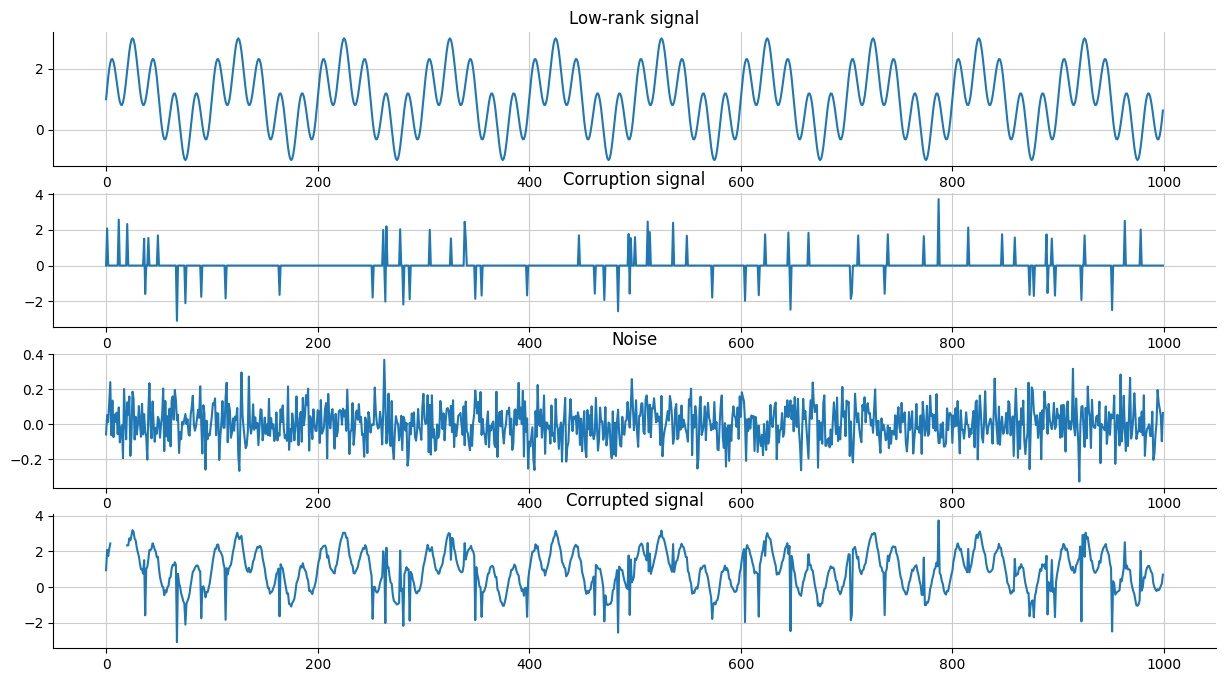

In [3]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(4, 1, 1)
ax.title.set_text("Low-rank signal")
plt.plot(X_true)

ax = fig.add_subplot(4, 1, 2)
ax.title.set_text("Corruption signal")
plt.plot(A_true)

ax = fig.add_subplot(4, 1, 3)
ax.title.set_text("Noise")
plt.plot(E_true)

ax = fig.add_subplot(4, 1, 4)
ax.title.set_text("Corrupted signal")
plt.plot(signal[:, 0])

plt.show()

## PCP RPCA

In [4]:
%%time

rpca_pcp = RPCAPCP(period=100, max_iter=5, mu=.5, lam=1)
X = rpca_pcp.fit_transform(signal)
corruptions = signal - X

CPU times: user 1.25 ms, sys: 1.06 ms, total: 2.31 ms
Wall time: 3.58 ms


## Temporal RPCA

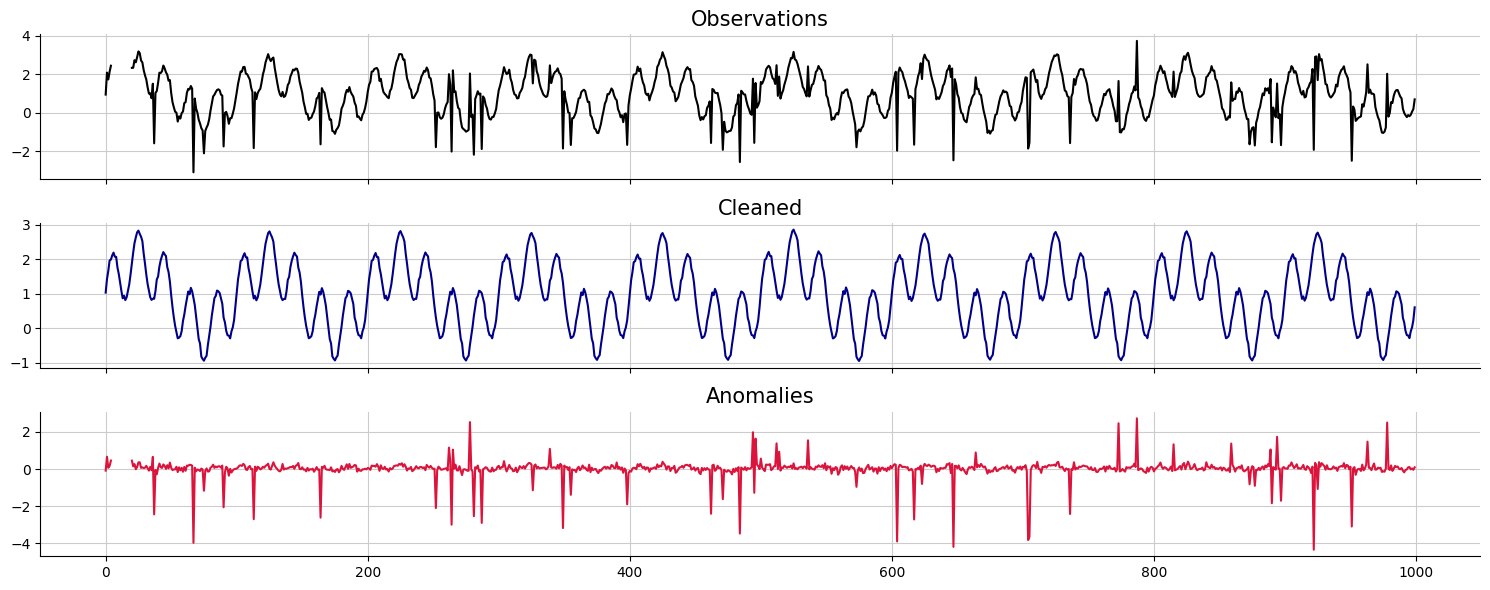

In [5]:
rpca_noisy = RPCANoisy(period=10, tau=2, lam=0.3, list_periods=[10], list_etas=[0.01], norm="L2")
X = rpca_noisy.fit_transform(signal)
corruptions = signal - X
plot.plot_signal([signal[:,0], X[:,0], corruptions[:, 0]])

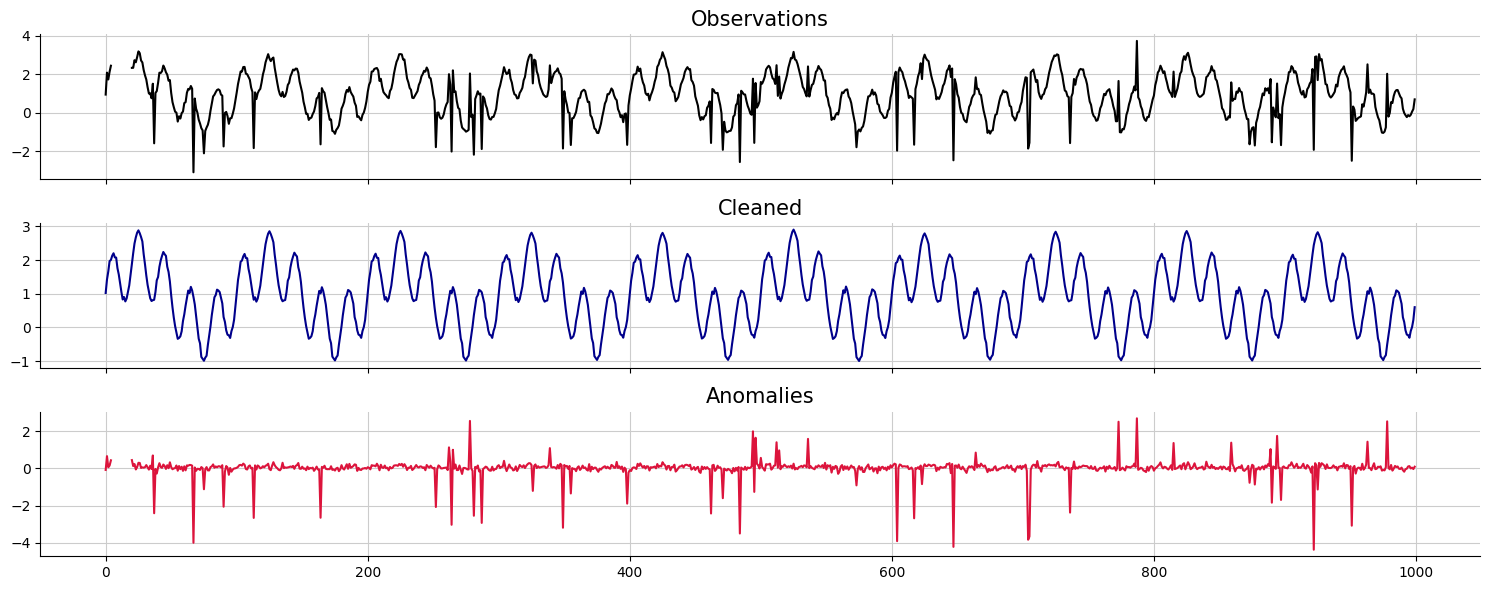

In [6]:
rpca_noisy = RPCANoisy(period=10, tau=2, lam=0.3, list_periods=[], list_etas=[], norm="L2")
X = rpca_noisy.fit_transform(signal)
corruptions = signal - X
plot.plot_signal([signal[:,0], X[:,0], corruptions[:, 0]])